# 線形回帰 [勾配降下法による解]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
plt.style.use('dark_background')

%precision 3
%matplotlib inline

In [2]:
def mse(y, y_):
    return ((y - y_)**2).mean()

#### データ準備

In [177]:
a = 1.0
b = 3.0
X_min = 0
X_max = 20
N = 1000
mu = 0
sigma = 2

In [178]:
e = np.random.normal(0, 2, N)
X = np.random.normal(10,3,N)
y = a*X + b + e
X = X.reshape(-1,1)
X2 = np.hstack([np.ones(len(X)).reshape(-1,1),X])

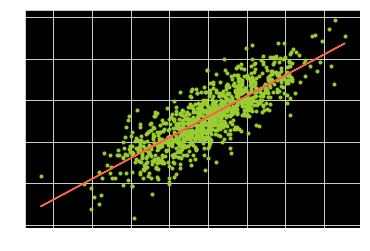

In [5]:
plt.scatter(X, y, marker=".", color="yellowgreen")
plt.plot(X, a * X + b, color="tomato")

#### a, bを総当たり的に当てはめ誤差を描画

In [19]:
def calcCost(x,y, a, b):
    return np.array([np.sqrt(np.mean(1/2*(y - (a2 * x + b2))**2)) for a1, b1 in zip(a,b) for a2, b2 in zip(a1, b1)]).reshape(a.shape)

In [20]:
a = np.linspace(-5, 5, 100)
b = np.linspace(-5,5, 100)
co = np.meshgrid(a,b)
error = calcCost(X,y, co[0], co[1])

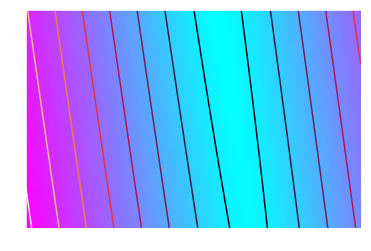

In [27]:
plt.contour(a, b, error)
plt.pcolormesh(a, b, error, cmap = plt.get_cmap('cool'))

#### 勾配降下法

In [89]:
def gradient_decent(X, y, eta=0.000018, n_iter=50000, verbose=True):
    
#     w = np.zeros(X.shape[1])
    w = np.random.randn(X.shape[1])
    cost = []
    for i in range(n_iter):
        output = np.dot(X, w)
        errors = output - y
        w -= eta * X.T.dot(errors) * 1/N
        cost = (errors*2).sum() / 2.0
        if verbose == True and i%1000 == 0:
            print("ITER=[{}]: ERROR:[{}]".format(i, cost))

    return w

In [90]:
gradient_decent(X2, y)

ITER=[0]: ERROR:[768.6186900408668]
ITER=[1000]: ERROR:[-8.371912711202384]
ITER=[2000]: ERROR:[-115.5301881662253]
ITER=[3000]: ERROR:[-130.17580545933063]
ITER=[4000]: ERROR:[-132.04438693352577]
ITER=[5000]: ERROR:[-132.1484957673217]
ITER=[6000]: ERROR:[-132.0091149905686]
ITER=[7000]: ERROR:[-131.8363125662928]
ITER=[8000]: ERROR:[-131.65910142960985]
ITER=[9000]: ERROR:[-131.48148837789003]
ITER=[10000]: ERROR:[-131.30402652440517]
ITER=[11000]: ERROR:[-131.12679198257325]
ITER=[12000]: ERROR:[-130.949794985964]
ITER=[13000]: ERROR:[-130.77303666975382]
ITER=[14000]: ERROR:[-130.59651691286538]
ITER=[15000]: ERROR:[-130.42023542101307]
ITER=[16000]: ERROR:[-130.24419187641294]
ITER=[17000]: ERROR:[-130.068385958409]
ITER=[18000]: ERROR:[-129.89281734635796]
ITER=[19000]: ERROR:[-129.71748571992254]
ITER=[20000]: ERROR:[-129.54239075923152]
ITER=[21000]: ERROR:[-129.3675321448092]
ITER=[22000]: ERROR:[-129.19290955766445]
ITER=[23000]: ERROR:[-129.01852267914967]
ITER=[24000]: ERR

array([0.835, 1.196])

#### numpy を使った勾配降下法

In [298]:
losses = []
epoch = 100000
alpha = 0.000018
w = np.random.randn(2)
for e in range(epoch):
    y_pred = np.dot(X2, w)
    error = (y - y_pred)
    w -= alpha * 1/N * np.dot(X.T, (y_pred - y))
    loss = 1/N * np.sum(1/2 * error**2)
    losses.append(loss)

#### Pytorchを使った勾配降下法

In [301]:
wt = torch.randn(2, device=device, dtype=dtype,requires_grad=True)
xt = torch.Tensor(X2)
yt = torch.Tensor(y)
losses = []
for e in range(epoch):
    y_pred = torch.mv(xt, wt)
    error = (y_pred - yt)
    loss = 1/N * torch.sum(1/2 * error**2)
    loss.backward()
    with torch.no_grad():
        wt -= alpha * wt.grad
        wt.grad.zero_()
    losses.append(loss)

In [302]:
wt

tensor([2.5457, 1.0470], requires_grad=True)

#### Pytorch + optimizer

In [227]:
import torch.optim as optim
import torch.nn as nn

In [322]:
epoch = 50000
lr = 0.0000018
wt = torch.randn(2, device=device, dtype=dtype,requires_grad=True)
xt = torch.Tensor(X2)
yt = torch.Tensor(y)
losses = []
optimizer = optim.SGD([wt], lr=lr, momentum=0.9, weight_decay=0.1)
optimizer = optim.Adam([wt])
criterion = nn.MSELoss()  
for e in range(epoch):
    y_pred = torch.mv(xt, wt)
#     loss = criterion(y_pred, yt)
    error = (y_pred - yt)
    loss = 1/N * torch.sum(1/2 * error**2)

    loss.backward()
    optimizer.step()
    losses.append(loss)
    if e==500:
       optimizer = optim.SGD([wt], lr=lr*0.001, momentum=0.9, weight_decay=0.1)
    if e==1000:
       optimizer = optim.SGD([wt], lr=lr*0.0001, momentum=0.9, weight_decay=0.1)
    if e==10000:
       optimizer = optim.SGD([wt], lr=lr*0.00001, momentum=0.9, weight_decay=0.1)
        

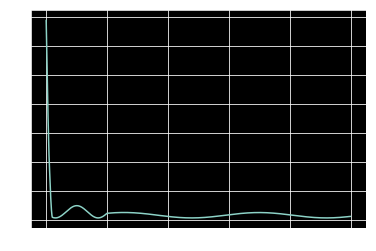

In [323]:
plt.plot(losses)

In [324]:
wt

tensor([1.4811, 0.9888], requires_grad=True)

#### numpyによる解

In [208]:
coefficent = np.linalg.lstsq(X2,y)[0]

/Users/yugi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


#### scikit-learnによる解

In [209]:
clf = LinearRegression()
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### 特異値分解を使用した解法

In [210]:
U,S,V = np.linalg.svd(X2)
diag = np.diag(S)
SSinv = np.zeros(X2.T.shape)
SSinv[:diag.shape[0], :diag.shape[1]] = np.diag(1/S)
C = np.dot(np.dot(V.T, SSinv), U.T)
w = np.dot(C,y)

#### 逆行列を使用した解法

In [211]:
ATAinv = np.linalg.inv(np.dot(X2.T, X2))
ww = np.dot(np.dot(ATAinv, X2.T), y)

array([0.48 , 1.235], dtype=float32)

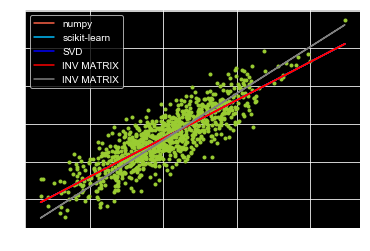

In [220]:
plt.scatter(X, y, marker='.', color="yellowgreen")
plt.plot(X, np.dot(X2, coefficent), color="tomato", label="numpy")
plt.plot(X, clf.predict(X), color="deepskyblue", label="scikit-learn")
plt.plot(X, np.dot(X2, w), color="blue", label="SVD")
plt.plot(X, np.dot(X2, ww), color="red", label="INV MATRIX")
plt.plot(X, np.dot(X2, wt.data.numpy()), color="gray", label="INV MATRIX")
plt.legend()

In [187]:
print("numpy: {}".format(coefficent))
print("scikit-learn: [{}, {}]".format(clf.intercept_,clf.coef_))
print("SVD: {}".format(w))
print("Inverse: {}".format(ww))

numpy: [2.99  1.007]
scikit-learn: [2.9903088171986454, [1.007]]
SVD: [2.99  1.007]
Inverse: [2.99  1.007]
